In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import re
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Load the dataset
df = pd.read_csv('depression_dataset_reddit_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [6]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


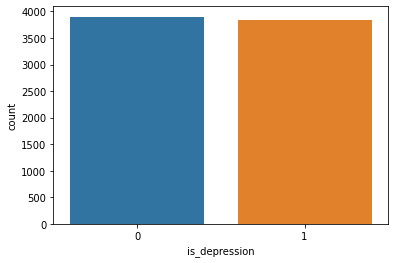

In [41]:
sns.countplot(x=df["is_depression"])

In [7]:
def clean_text(text):
  
    text = "".join([word for word in text if word not in string.punctuation]) # Remove punctuation
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\d+', '', text) # Remove numbers
    words = word_tokenize(text) # Tokenize the text
    stop_words = set(stopwords.words("english")) # Remove stop words
    words = [word for word in words if word not in stop_words]
    text = " ".join(words) # Join the words back into a single string
    
    return text

In [12]:
df['clean_text'] = df['clean_text'].apply(clean_text)
df.head()

,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


# split 

In [13]:
# Split the data into features and labels
X = df["clean_text"]
y = df["is_depression"]

In [14]:
# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# modeling

____

# LR

In [16]:
# Train a logistic regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [21]:
# Evaluate the model's accuracy
print("Accuracy:", classification_report(y_test, y_pred))

Accuracy:               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1190
           1       0.98      0.90      0.94      1130

    accuracy                           0.94      2320
   macro avg       0.95      0.94      0.94      2320
weighted avg       0.95      0.94      0.94      2320



# LR with GS

In [25]:
lr_GS = LogisticRegression()
# make param grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
# create and fit the model
lr_GS = GridSearchCV(lr_GS, param_grid, cv=10, n_jobs=-1)

In [28]:
lr_GS.fit(X_train,y_train)
y_pred = lr_GS.predict(X_test)

In [29]:
print('Test model accuracy: ', classification_report(y_test, y_pred))

Test model accuracy:                precision    recall  f1-score   support

           0       0.94      0.98      0.96      1190
           1       0.98      0.93      0.95      1130

    accuracy                           0.96      2320
   macro avg       0.96      0.96      0.96      2320
weighted avg       0.96      0.96      0.96      2320



--------